In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import hjb_modified
from numba import njit

Equation with damage function $j$:

\begin{align}
0 = \max_e \min_{h_2} &-\delta \phi(y,z_2) + \delta\eta\log e  + \frac{\partial \phi}{\partial y}(y, z_2) z_2 e\\
&+ \left[\frac{\partial \phi}{\partial z_2}(y, z_2)\right]\left[-\rho(z_2 -  \mu_{2}) \right] + \left[\frac{\partial^2 \phi}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)\\
& + (\eta-1)\left(\frac{d}{d \tau}\Lambda(y)z_2 e\right)\\
\end{align}

where

\begin{equation}
\Lambda_j(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y, z_2)z_2 + (\eta-1)\frac{d}{d \tau}\Lambda(y)z_2}
$$

In [3]:
# Model parameters
η = .032
δ = .01
# Z process
μ_2 = 1.86/1000.
ρ = 0.9
σ_2 = np.sqrt(2*ρ/10416.29)
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.
# Three damages
# λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])
# Two damages
λ_2p_state = np.array([0., 0.0197*2])
λ_2p_prior = np.array([0.5, 0.5])

In [4]:
σ_2

0.013145579054341883

In [3]:
# Grid setting
n_z = 50
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

n_y = 50
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_state = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, _ = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None,
                           ϵ=.5, tol=1e-8, max_iter=10_000, use_python=False)
    ϕ_state.append(ϕ)

Iteration 1: LHS Error: 0.0014451636931586175; RHS Error 0.0018258099200731002
Iteration 2: LHS Error: 0.0013253543476743146; RHS Error 0.0015870510036186374
Iteration 3: LHS Error: 0.0012482704125546988; RHS Error 0.0014338404731752126
Iteration 4: LHS Error: 0.0011919968102455727; RHS Error 0.0013251680285864985
Iteration 5: LHS Error: 0.0011463650826926911; RHS Error 0.0012429991770910576
Iteration 6: LHS Error: 0.001106890818966558; RHS Error 0.0011781268841306283
Iteration 7: LHS Error: 0.0010717802370126686; RHS Error 0.0011254127938292787
Iteration 8: LHS Error: 0.0010403166598284466; RHS Error 0.001081709804926243
Iteration 9: LHS Error: 0.0010120952315285595; RHS Error 0.0010448916766797565
Iteration 10: LHS Error: 0.0009867494804204398; RHS Error 0.0010134107520711072
Iteration 11: LHS Error: 0.0009639026675789808; RHS Error 0.0009860979719144083
Iteration 12: LHS Error: 0.0009431883169921055; RHS Error 0.000962061237849201
Iteration 13: LHS Error: 0.0009242746676678872; RHS 

Iteration 109: LHS Error: 0.00036822915734066597; RHS Error 0.0003691275590381349
Iteration 110: LHS Error: 0.0003655192974488797; RHS Error 0.00036640544558134394
Iteration 111: LHS Error: 0.0003628347698018536; RHS Error 0.00036370890135235936
Iteration 112: LHS Error: 0.0003601752209067277; RHS Error 0.00036103757003419853
Iteration 113: LHS Error: 0.00035754030493849454; RHS Error 0.00035839109732343507
Iteration 114: LHS Error: 0.0003549296831463905; RHS Error 0.0003557691394616547
Iteration 115: LHS Error: 0.000352343024746557; RHS Error 0.00035317135865913375
Iteration 116: LHS Error: 0.000349780006182257; RHS Error 0.0003505974255351344
Iteration 117: LHS Error: 0.00034724031046197423; RHS Error 0.0003480470196506587
Iteration 118: LHS Error: 0.0003447236275496979; RHS Error 0.0003455198229370156
Iteration 119: LHS Error: 0.0003422296539016684; RHS Error 0.0003430155283186115
Iteration 120: LHS Error: 0.00033975809180321337; RHS Error 0.00034053383487077675
Iteration 121: LHS E

Iteration 217: LHS Error: 0.0001752956952924961; RHS Error 0.00017556830376836688
Iteration 218: LHS Error: 0.0001741552529010565; RHS Error 0.0001744253263674401
Iteration 219: LHS Error: 0.00017302297166052472; RHS Error 0.00017329053925439362
Iteration 220: LHS Error: 0.00017189878335803488; RHS Error 0.00017216387382904897
Iteration 221: LHS Error: 0.0001707826202445445; RHS Error 0.0001710452604776143
Iteration 222: LHS Error: 0.00016967441423368368; RHS Error 0.00016993463227039582
Iteration 223: LHS Error: 0.0001685740988781187; RHS Error 0.00016883192289926735
Iteration 224: LHS Error: 0.00016748160848020777; RHS Error 0.00016773706321474003
Iteration 225: LHS Error: 0.0001663968776648428; RHS Error 0.00016664999095259922
Iteration 226: LHS Error: 0.00016531984199798233; RHS Error 0.0001655706389979563
Iteration 227: LHS Error: 0.00016425043798899697; RHS Error 0.00016449894337848125
Iteration 228: LHS Error: 0.00016318860236964883; RHS Error 0.00016343484369304702
Iteration 22

Iteration 317: LHS Error: 9.282021311436683e-05; RHS Error 9.293557597071594e-05
Iteration 318: LHS Error: 9.224464978303815e-05; RHS Error 9.235909170939613e-05
Iteration 319: LHS Error: 9.167285808341086e-05; RHS Error 9.178638638544507e-05
Iteration 320: LHS Error: 9.110480908228191e-05; RHS Error 9.121743431922077e-05
Iteration 321: LHS Error: 9.05404775511931e-05; RHS Error 9.065220443641863e-05
Iteration 322: LHS Error: 8.99798364907417e-05; RHS Error 9.009067499749651e-05
Iteration 323: LHS Error: 8.942285933992433e-05; RHS Error 8.953281951116956e-05
Iteration 324: LHS Error: 8.886952022721384e-05; RHS Error 8.897860833068788e-05
Iteration 325: LHS Error: 8.831979285997549e-05; RHS Error 8.842801663185127e-05
Iteration 326: LHS Error: 8.777365252858604e-05; RHS Error 8.788101612228021e-05
Iteration 327: LHS Error: 8.723107252460449e-05; RHS Error 8.733758728754937e-05
Iteration 328: LHS Error: 8.669202861753822e-05; RHS Error 8.679770147632939e-05
Iteration 329: LHS Error: 8.61

Iteration 424: LHS Error: 4.821322295552044e-05; RHS Error 4.826420324474255e-05
Iteration 425: LHS Error: 4.792303373896134e-05; RHS Error 4.797364057701633e-05
Iteration 426: LHS Error: 4.763465426928237e-05; RHS Error 4.7684898108811265e-05
Iteration 427: LHS Error: 4.734807288729603e-05; RHS Error 4.739794768078207e-05
Iteration 428: LHS Error: 4.7063277717529495e-05; RHS Error 4.71127909715879e-05
Iteration 429: LHS Error: 4.6780257135975445e-05; RHS Error 4.68294094460313e-05
Iteration 430: LHS Error: 4.64989993624737e-05; RHS Error 4.654779626630395e-05
Iteration 431: LHS Error: 4.621949285409099e-05; RHS Error 4.626793361994081e-05
Iteration 432: LHS Error: 4.594172617485015e-05; RHS Error 4.598981586387187e-05
Iteration 433: LHS Error: 4.566568784114544e-05; RHS Error 4.571343103845706e-05
Iteration 434: LHS Error: 4.5391366531213895e-05; RHS Error 4.543876407282516e-05
Iteration 435: LHS Error: 4.511875100990381e-05; RHS Error 4.5165805091477865e-05
Iteration 436: LHS Error: 

Iteration 526: LHS Error: 2.6203842041189196e-05; RHS Error 2.6228678103193924e-05
Iteration 527: LHS Error: 2.6049069480185705e-05; RHS Error 2.6073725907545925e-05
Iteration 528: LHS Error: 2.5895225664512855e-05; RHS Error 2.5919706462153107e-05
Iteration 529: LHS Error: 2.5742327005626175e-05; RHS Error 2.576663922805101e-05
Iteration 530: LHS Error: 2.5590331703281843e-05; RHS Error 2.5614502635875713e-05
Iteration 531: LHS Error: 2.5439267524143827e-05; RHS Error 2.546325738017987e-05
Iteration 532: LHS Error: 2.528911859148164e-05; RHS Error 2.531295077115559e-05
Iteration 533: LHS Error: 2.5139880003438586e-05; RHS Error 2.5163552386105854e-05
Iteration 534: LHS Error: 2.4991544741920224e-05; RHS Error 2.5015053910198547e-05
Iteration 535: LHS Error: 2.4844106499624652e-05; RHS Error 2.4867455997896592e-05
Iteration 536: LHS Error: 2.4697559905223487e-05; RHS Error 2.472074952049601e-05
Iteration 537: LHS Error: 2.4551899566224722e-05; RHS Error 2.4574933038133163e-05
Iteration

Iteration 630: LHS Error: 1.4213695311612873e-05; RHS Error 1.4226017690039425e-05
Iteration 631: LHS Error: 1.4130891254918176e-05; RHS Error 1.4143131976324498e-05
Iteration 632: LHS Error: 1.4048578985334514e-05; RHS Error 1.406073930674775e-05
Iteration 633: LHS Error: 1.3966755503386219e-05; RHS Error 1.39788352084445e-05
Iteration 634: LHS Error: 1.3885417828013447e-05; RHS Error 1.3897418355088439e-05
Iteration 635: LHS Error: 1.3804562992408842e-05; RHS Error 1.3816484033873032e-05
Iteration 636: LHS Error: 1.3724188050415198e-05; RHS Error 1.3736030915181309e-05
Iteration 637: LHS Error: 1.3644290079939392e-05; RHS Error 1.3656054244979838e-05
Iteration 638: LHS Error: 1.3564866217036231e-05; RHS Error 1.3576554765430703e-05
Iteration 639: LHS Error: 1.3485913474289846e-05; RHS Error 1.349752448920956e-05
Iteration 640: LHS Error: 1.3407429046582986e-05; RHS Error 1.3418962967018367e-05
Iteration 641: LHS Error: 1.33294100792547e-05; RHS Error 1.3340868411665851e-05
Iteration 

Iteration 732: LHS Error: 7.856966644265162e-06; RHS Error 7.8633059145825e-06
Iteration 733: LHS Error: 7.811660350978689e-06; RHS Error 7.817959313931267e-06
Iteration 734: LHS Error: 7.766619267227104e-06; RHS Error 7.77287768849856e-06
Iteration 735: LHS Error: 7.721841804142482e-06; RHS Error 7.72806060805745e-06
Iteration 736: LHS Error: 7.67732638243257e-06; RHS Error 7.683504974817577e-06
Iteration 737: LHS Error: 7.633071452142759e-06; RHS Error 7.653950366813718e-06
Iteration 738: LHS Error: 7.589075440628257e-06; RHS Error 7.697105158085884e-06
Iteration 739: LHS Error: 7.545336808828518e-06; RHS Error 7.740008017544098e-06
Iteration 740: LHS Error: 7.501854024344334e-06; RHS Error 7.782662775942866e-06
Iteration 741: LHS Error: 7.458625554596088e-06; RHS Error 7.825066572090655e-06
Iteration 742: LHS Error: 7.415649882991371e-06; RHS Error 7.867223194342509e-06
Iteration 743: LHS Error: 7.372925482057591e-06; RHS Error 7.90913419469394e-06
Iteration 744: LHS Error: 7.330450

Iteration 842: LHS Error: 4.170598255137659e-06; RHS Error 1.1051865562303025e-05
Iteration 843: LHS Error: 4.146752592568137e-06; RHS Error 1.1075279455547826e-05
Iteration 844: LHS Error: 4.123044999568282e-06; RHS Error 1.1098556915600626e-05
Iteration 845: LHS Error: 4.099474330443442e-06; RHS Error 1.11217003441516e-05
Iteration 846: LHS Error: 4.076040029721284e-06; RHS Error 1.114471026073872e-05
Iteration 847: LHS Error: 4.052741411908478e-06; RHS Error 1.1167587185067357e-05
Iteration 848: LHS Error: 4.029577472197676e-06; RHS Error 1.1190332736418611e-05
Iteration 849: LHS Error: 4.0065474489064945e-06; RHS Error 1.1212945809619236e-05
Iteration 850: LHS Error: 3.98365050299776e-06; RHS Error 1.1235427965722604e-05
Iteration 851: LHS Error: 3.960885924372826e-06; RHS Error 1.125778226318411e-05
Iteration 852: LHS Error: 3.938252992843894e-06; RHS Error 1.1280006115569436e-05
Iteration 853: LHS Error: 3.915750881877678e-06; RHS Error 1.130210201913417e-05
Iteration 854: LHS Er

Iteration 946: LHS Error: 2.301748154534544e-06; RHS Error 1.288735317390619e-05
Iteration 947: LHS Error: 2.2886670593275094e-06; RHS Error 1.2900207425155545e-05
Iteration 948: LHS Error: 2.2756611661178816e-06; RHS Error 1.2912987864463531e-05
Iteration 949: LHS Error: 2.2627300839683784e-06; RHS Error 1.2925694615914269e-05
Iteration 950: LHS Error: 2.2498733522891e-06; RHS Error 1.2938328649958692e-05
Iteration 951: LHS Error: 2.2370905312096845e-06; RHS Error 1.2950890208137745e-05
Iteration 952: LHS Error: 2.2243811800409796e-06; RHS Error 1.2963379664489034e-05
Iteration 953: LHS Error: 2.2117448685021746e-06; RHS Error 1.2975797448721562e-05
Iteration 954: LHS Error: 2.1991811572086295e-06; RHS Error 1.2988143968030007e-05
Iteration 955: LHS Error: 2.186689620362059e-06; RHS Error 1.3000419666582292e-05
Iteration 956: LHS Error: 2.1742698273069516e-06; RHS Error 1.3012624931986114e-05
Iteration 957: LHS Error: 2.1619213546458793e-06; RHS Error 1.302476020364064e-05
Iteration 9

Iteration 1045: LHS Error: 1.3112089636974078e-06; RHS Error 1.3860995941108751e-05
Iteration 1046: LHS Error: 1.3037946323679606e-06; RHS Error 1.386828547564941e-05
Iteration 1047: LHS Error: 1.2964228501000097e-06; RHS Error 1.3875532777635159e-05
Iteration 1048: LHS Error: 1.2890930737863293e-06; RHS Error 1.3882739656950055e-05
Iteration 1049: LHS Error: 1.2818050157403782e-06; RHS Error 1.3889905796502693e-05
Iteration 1050: LHS Error: 1.2745584601903115e-06; RHS Error 1.3897031217098479e-05
Iteration 1051: LHS Error: 1.2673531732260157e-06; RHS Error 1.390411611227639e-05
Iteration 1052: LHS Error: 1.2602569060132796e-06; RHS Error 1.3911160676399834e-05
Iteration 1053: LHS Error: 1.2531026173101534e-06; RHS Error 1.391817080983169e-05
Iteration 1054: LHS Error: 1.2460005296421883e-06; RHS Error 1.3925136885101696e-05
Iteration 1055: LHS Error: 1.238947619955355e-06; RHS Error 1.3932061304783869e-05
Iteration 1056: LHS Error: 1.2319402050708916e-06; RHS Error 1.3938946175359648e

Iteration 1147: LHS Error: 7.361834128694067e-07; RHS Error 1.4426524604180735e-05
Iteration 1148: LHS Error: 7.320370209451532e-07; RHS Error 1.4430603455207634e-05
Iteration 1149: LHS Error: 7.279141041871551e-07; RHS Error 1.4434659255706033e-05
Iteration 1150: LHS Error: 7.238147676641438e-07; RHS Error 1.4438692113171543e-05
Iteration 1151: LHS Error: 7.197386312357557e-07; RHS Error 1.4442700927972275e-05
Iteration 1152: LHS Error: 7.156850204276255e-07; RHS Error 1.4446689280475569e-05
Iteration 1153: LHS Error: 7.116547144914165e-07; RHS Error 1.4450654203111875e-05
Iteration 1154: LHS Error: 7.076472731681882e-07; RHS Error 1.44545966033029e-05
Iteration 1155: LHS Error: 7.036625334910784e-07; RHS Error 1.4458516626725086e-05
Iteration 1156: LHS Error: 6.997003701991744e-07; RHS Error 1.446241442154485e-05
Iteration 1157: LHS Error: 6.957606429186525e-07; RHS Error 1.44662901683636e-05
Iteration 1158: LHS Error: 6.918432320091039e-07; RHS Error 1.4470143962378194e-05
Iteration

Iteration 1254: LHS Error: 4.0266708827008113e-07; RHS Error 1.4754670774693671e-05
Iteration 1255: LHS Error: 4.0040534705909625e-07; RHS Error 1.4756899016522785e-05
Iteration 1256: LHS Error: 3.9815702472523196e-07; RHS Error 1.4759112408434596e-05
Iteration 1257: LHS Error: 3.9594655909525045e-07; RHS Error 1.4761312543233986e-05
Iteration 1258: LHS Error: 3.937001906290094e-07; RHS Error 1.4763496066127514e-05
Iteration 1259: LHS Error: 3.9150695169132277e-07; RHS Error 1.476567423145574e-05
Iteration 1260: LHS Error: 3.894530892223358e-07; RHS Error 1.4767834368941508e-05
Iteration 1261: LHS Error: 3.871948912048673e-07; RHS Error 1.4769965291354208e-05
Iteration 1262: LHS Error: 3.8497945277493617e-07; RHS Error 1.4772100644800572e-05
Iteration 1263: LHS Error: 3.827966740949096e-07; RHS Error 1.4774229379347715e-05
Iteration 1264: LHS Error: 3.806369267139731e-07; RHS Error 1.4776346086547206e-05
Iteration 1265: LHS Error: 3.7849528443378855e-07; RHS Error 1.4778449746925262e-0

Iteration 1355: LHS Error: 2.2818226953769116e-07; RHS Error 1.4926386323369737e-05
Iteration 1356: LHS Error: 2.269033858026681e-07; RHS Error 1.4927645189280123e-05
Iteration 1357: LHS Error: 2.2563162573041584e-07; RHS Error 1.4928897042151704e-05
Iteration 1358: LHS Error: 2.243669558060768e-07; RHS Error 1.4930141921440767e-05
Iteration 1359: LHS Error: 2.231093396837247e-07; RHS Error 1.4931379853550452e-05
Iteration 1360: LHS Error: 2.2185874812286066e-07; RHS Error 1.4932610875628997e-05
Iteration 1361: LHS Error: 2.2061514018401063e-07; RHS Error 1.4933835019843161e-05
Iteration 1362: LHS Error: 2.1937848744546518e-07; RHS Error 1.4935052328002383e-05
Iteration 1363: LHS Error: 2.1814875499071018e-07; RHS Error 1.4936262824039774e-05
Iteration 1364: LHS Error: 2.169259059880968e-07; RHS Error 1.4937466541375434e-05
Iteration 1365: LHS Error: 2.157099088240244e-07; RHS Error 1.4938663522116955e-05
Iteration 1366: LHS Error: 2.145007275411448e-07; RHS Error 1.4939853798211873e-0

Iteration 1461: LHS Error: 1.2581822399215792e-07; RHS Error 1.5027168702426517e-05
Iteration 1462: LHS Error: 1.2511411612292633e-07; RHS Error 1.5027861923643925e-05
Iteration 1463: LHS Error: 1.2441394128814842e-07; RHS Error 1.5028551248523871e-05
Iteration 1464: LHS Error: 1.2371769959884649e-07; RHS Error 1.5029236739680114e-05
Iteration 1465: LHS Error: 1.2302535391806035e-07; RHS Error 1.5029918364887346e-05
Iteration 1466: LHS Error: 1.2233689648810664e-07; RHS Error 1.5030596186099482e-05
Iteration 1467: LHS Error: 1.2165227861182792e-07; RHS Error 1.5031270191009092e-05
Iteration 1468: LHS Error: 1.2097150604850615e-07; RHS Error 1.5031940439971326e-05
Iteration 1469: LHS Error: 1.2029455113971022e-07; RHS Error 1.5032606936418117e-05
Iteration 1470: LHS Error: 1.1962156076794628e-07; RHS Error 1.5033269681965578e-05
Iteration 1471: LHS Error: 1.1895198563649512e-07; RHS Error 1.5033929005816085e-05
Iteration 1472: LHS Error: 1.1828631453492111e-07; RHS Error 1.5034584607120

Iteration 1573: LHS Error: 6.709886583855518e-08; RHS Error 1.50850539976878e-05
Iteration 1574: LHS Error: 6.672354917192092e-08; RHS Error 1.5085423109096122e-05
Iteration 1575: LHS Error: 6.635032374913141e-08; RHS Error 1.5085790156829041e-05
Iteration 1576: LHS Error: 6.59791777046781e-08; RHS Error 1.5086155155118663e-05
Iteration 1577: LHS Error: 6.56101001722531e-08; RHS Error 1.508651813045595e-05
Iteration 1578: LHS Error: 6.524307973043708e-08; RHS Error 1.5086879073150303e-05
Iteration 1579: LHS Error: 6.487810526312199e-08; RHS Error 1.5087238010494126e-05
Iteration 1580: LHS Error: 6.45151654182774e-08; RHS Error 1.5087594935669522e-05
Iteration 1581: LHS Error: 6.415424867733943e-08; RHS Error 1.5087949882447438e-05
Iteration 1582: LHS Error: 6.379534392420005e-08; RHS Error 1.5088302844063753e-05
Iteration 1583: LHS Error: 6.343844104195195e-08; RHS Error 1.5088653831554777e-05
Iteration 1584: LHS Error: 6.308352791528637e-08; RHS Error 1.5089002868328219e-05
Iteration 

Iteration 1676: LHS Error: 3.764642747539071e-08; RHS Error 1.5114217186767368e-05
Iteration 1677: LHS Error: 3.74366412592142e-08; RHS Error 1.511442244286421e-05
Iteration 1678: LHS Error: 3.7227968027742087e-08; RHS Error 1.5114626575971329e-05
Iteration 1679: LHS Error: 3.70203903365951e-08; RHS Error 1.5114829639777333e-05
Iteration 1680: LHS Error: 3.6813901621579603e-08; RHS Error 1.5115031632208578e-05
Iteration 1681: LHS Error: 3.6608508419133656e-08; RHS Error 1.5115232533928968e-05
Iteration 1682: LHS Error: 3.640420634387631e-08; RHS Error 1.5115432385158717e-05
Iteration 1683: LHS Error: 3.620097488443719e-08; RHS Error 1.5115631195606856e-05
Iteration 1684: LHS Error: 3.599883140192883e-08; RHS Error 1.5115828913181808e-05
Iteration 1685: LHS Error: 3.579777475837265e-08; RHS Error 1.5116025557629711e-05
Iteration 1686: LHS Error: 3.559470228287065e-08; RHS Error 1.5116221171608069e-05
Iteration 1687: LHS Error: 3.5392103941989106e-08; RHS Error 1.5116418325745052e-05
Ite

Iteration 1788: LHS Error: 2.005980663521978e-08; RHS Error 1.513144448318164e-05
Iteration 1789: LHS Error: 1.9946150509042582e-08; RHS Error 1.513155386359045e-05
Iteration 1790: LHS Error: 1.983539375804977e-08; RHS Error 1.5131664498394936e-05
Iteration 1791: LHS Error: 1.9723568903118327e-08; RHS Error 1.5131772825601733e-05
Iteration 1792: LHS Error: 1.9611750820547336e-08; RHS Error 1.5131880176427444e-05
Iteration 1793: LHS Error: 1.9502570558493915e-08; RHS Error 1.5131991468269722e-05
Iteration 1794: LHS Error: 1.9393425990110735e-08; RHS Error 1.5132095245953435e-05
Iteration 1795: LHS Error: 1.9283269786507518e-08; RHS Error 1.5132200943884311e-05
Iteration 1796: LHS Error: 1.917569784903872e-08; RHS Error 1.5132310552814316e-05
Iteration 1797: LHS Error: 1.9068102971586676e-08; RHS Error 1.5132416460487139e-05
Iteration 1798: LHS Error: 1.896004483969982e-08; RHS Error 1.5132516146099334e-05
Iteration 1799: LHS Error: 1.8854231495502027e-08; RHS Error 1.5132622960339296e-0

Iteration 1903: LHS Error: 1.0485141671567888e-08; RHS Error 1.514077023496616e-05
Iteration 1904: LHS Error: 1.0426139077091001e-08; RHS Error 1.5140827916496069e-05
Iteration 1905: LHS Error: 1.0367459335469675e-08; RHS Error 1.5140885284904053e-05
Iteration 1906: LHS Error: 1.0307187534031037e-08; RHS Error 1.5140942216633783e-05
Iteration 1907: LHS Error: 1.0255633522970875e-08; RHS Error 1.514101119490718e-05
Iteration 1908: LHS Error: 1.0189987062481087e-08; RHS Error 1.5141047928018958e-05
Iteration 1909: LHS Error: 1.0141395737073289e-08; RHS Error 1.5141115991490484e-05
Iteration 1910: LHS Error: 1.0075493050987205e-08; RHS Error 1.5141154955278409e-05
Iteration 1911: LHS Error: 1.0028460839528464e-08; RHS Error 1.514122465523255e-05
Iteration 1912: LHS Error: 9.96254967411403e-09; RHS Error 1.5141264089003252e-05
Iteration 1: LHS Error: 0.0014451636894532152; RHS Error 0.0018258099200916273
Iteration 2: LHS Error: 0.00132535433015969; RHS Error 0.001587051000266535
Iteration 

Iteration 98: LHS Error: 0.00037630359887268205; RHS Error 0.00037790491252012314
Iteration 99: LHS Error: 0.0003728661376136422; RHS Error 0.00037445147292863927
Iteration 100: LHS Error: 0.00036946128241456544; RHS Error 0.0003710308199246131
Iteration 101: LHS Error: 0.0003660886878022601; RHS Error 0.00036764260302291665
Iteration 102: LHS Error: 0.00036274801994942707; RHS Error 0.0003642864883371516
Iteration 103: LHS Error: 0.000359438948542401; RHS Error 0.00036096214004537996
Iteration 104: LHS Error: 0.000356161144582548; RHS Error 0.00035766923514383254
Iteration 105: LHS Error: 0.00035291428644061706; RHS Error 0.00035440744535163805
Iteration 106: LHS Error: 0.00034969805821739863; RHS Error 0.00035117645526146256
Iteration 107: LHS Error: 0.00034651214694797483; RHS Error 0.00034797594617866524
Iteration 108: LHS Error: 0.0003433562447183597; RHS Error 0.0003448056064134403
Iteration 109: LHS Error: 0.00034023004669941903; RHS Error 0.000341665136217755
Iteration 110: LHS

Iteration 198: LHS Error: 0.00018924918228897802; RHS Error 0.00019469750498604945
Iteration 199: LHS Error: 0.0001883136848645911; RHS Error 0.00019376201207899004
Iteration 200: LHS Error: 0.00018738280493812987; RHS Error 0.0001928311718328084
Iteration 201: LHS Error: 0.000186456525863396; RHS Error 0.00019190493599088886
Iteration 202: LHS Error: 0.0001855348256420003; RHS Error 0.00019098327200336749
Iteration 203: LHS Error: 0.00018461768213769159; RHS Error 0.00019006616101702466
Iteration 204: LHS Error: 0.00018370507174221562; RHS Error 0.00018915358060290891
Iteration 205: LHS Error: 0.00018279697222635394; RHS Error 0.00018824551030800389
Iteration 206: LHS Error: 0.0001818933634560732; RHS Error 0.0001873419282777647
Iteration 207: LHS Error: 0.00018099420505056363; RHS Error 0.0001864427914858077
Iteration 208: LHS Error: 0.00018009950399297536; RHS Error 0.00018554810545687894
Iteration 209: LHS Error: 0.00017920922644175385; RHS Error 0.00018465785283392798
Iteration 21

Iteration 299: LHS Error: 0.00011472565752676522; RHS Error 0.00012017638661681037
Iteration 300: LHS Error: 0.00011415850511414805; RHS Error 0.00011960925146307634
Iteration 301: LHS Error: 0.0001135941558405712; RHS Error 0.00011904491986024031
Iteration 302: LHS Error: 0.00011303259600650706; RHS Error 0.0001184833778720648
Iteration 303: LHS Error: 0.00011247381180254368; RHS Error 0.00011792461153399252
Iteration 304: LHS Error: 0.00011191778957655996; RHS Error 0.00011736860722870534
Iteration 305: LHS Error: 0.0001113645157089782; RHS Error 0.00011681535127364664
Iteration 306: LHS Error: 0.00011081397655177128; RHS Error 0.0001162648301536964
Iteration 307: LHS Error: 0.00011026615870579626; RHS Error 0.00011571703039715275
Iteration 308: LHS Error: 0.00010972104870222987; RHS Error 0.00011517193812080642
Iteration 309: LHS Error: 0.00010917863311439568; RHS Error 0.00011462954031575056
Iteration 310: LHS Error: 0.00010863889867680776; RHS Error 0.00011408982376766211
Iteratio

Iteration 402: LHS Error: 6.886019381445452e-05; RHS Error 7.431240619139474e-05
Iteration 403: LHS Error: 6.85197579884389e-05; RHS Error 7.397198142322642e-05
Iteration 404: LHS Error: 6.818100506246483e-05; RHS Error 7.363323980937757e-05
Iteration 405: LHS Error: 6.784392556059837e-05; RHS Error 7.32961726614611e-05
Iteration 406: LHS Error: 6.750851427739235e-05; RHS Error 7.29607718001142e-05
Iteration 407: LHS Error: 6.71747605249795e-05; RHS Error 7.262702847463153e-05
Iteration 408: LHS Error: 6.684265627575348e-05; RHS Error 7.22949349665997e-05
Iteration 409: LHS Error: 6.651219408022879e-05; RHS Error 7.196448325198226e-05
Iteration 410: LHS Error: 6.618336484900955e-05; RHS Error 7.163566495174253e-05
Iteration 411: LHS Error: 6.58561638724603e-05; RHS Error 7.130847227524519e-05
Iteration 412: LHS Error: 6.553059891535595e-05; RHS Error 7.0982902350409e-05
Iteration 413: LHS Error: 6.520661058159738e-05; RHS Error 7.06589266126883e-05
Iteration 414: LHS Error: 6.488422862

Iteration 506: LHS Error: 4.11253829703806e-05; RHS Error 4.65784845107366e-05
Iteration 507: LHS Error: 4.092204276780198e-05; RHS Error 4.6375158129148856e-05
Iteration 508: LHS Error: 4.071995853838217e-05; RHS Error 4.617283882168776e-05
Iteration 509: LHS Error: 4.051851257376449e-05; RHS Error 4.597152849357666e-05
Iteration 510: LHS Error: 4.031810116718326e-05; RHS Error 4.5771212039330355e-05
Iteration 511: LHS Error: 4.011873455535275e-05; RHS Error 4.557187312189461e-05
Iteration 512: LHS Error: 3.9920369210438844e-05; RHS Error 4.5373517795643684e-05
Iteration 513: LHS Error: 3.972299055711448e-05; RHS Error 4.517614831194385e-05
Iteration 514: LHS Error: 3.9526593511682306e-05; RHS Error 4.497975726045706e-05
Iteration 515: LHS Error: 3.9331171965195644e-05; RHS Error 4.478433840516326e-05
Iteration 516: LHS Error: 3.913671392083429e-05; RHS Error 4.458988569022387e-05
Iteration 517: LHS Error: 3.894321530205358e-05; RHS Error 4.4396393426963574e-05
Iteration 518: LHS Erro

Iteration 613: LHS Error: 2.4197994868344064e-05; RHS Error 2.986635272164955e-05
Iteration 614: LHS Error: 2.4078351057901792e-05; RHS Error 2.9860803120459393e-05
Iteration 615: LHS Error: 2.3959298753012392e-05; RHS Error 2.9855377147023428e-05
Iteration 616: LHS Error: 2.384083504915202e-05; RHS Error 2.985007361288347e-05
Iteration 617: LHS Error: 2.3722957017510704e-05; RHS Error 2.9844891008567716e-05
Iteration 618: LHS Error: 2.360566181365542e-05; RHS Error 2.9839828235845613e-05
Iteration 619: LHS Error: 2.3488946474997663e-05; RHS Error 2.9834884183008235e-05
Iteration 620: LHS Error: 2.3372808217209107e-05; RHS Error 2.983005761490146e-05
Iteration 621: LHS Error: 2.3257244077132255e-05; RHS Error 2.9825347113929647e-05
Iteration 622: LHS Error: 2.314225136763881e-05; RHS Error 2.9820751338123508e-05
Iteration 623: LHS Error: 2.3027827129609713e-05; RHS Error 2.98162690772093e-05
Iteration 624: LHS Error: 2.291396860172601e-05; RHS Error 2.9811898813253456e-05
Iteration 625

Iteration 726: LHS Error: 1.3820406449233102e-05; RHS Error 2.9781487165945542e-05
Iteration 727: LHS Error: 1.375206756798475e-05; RHS Error 2.978390202949024e-05
Iteration 728: LHS Error: 1.3684066680313967e-05; RHS Error 2.9786348464185745e-05
Iteration 729: LHS Error: 1.3616402267241368e-05; RHS Error 2.9788827720590412e-05
Iteration 730: LHS Error: 1.3549074882546197e-05; RHS Error 2.9791335199282163e-05
Iteration 731: LHS Error: 1.348208439050369e-05; RHS Error 2.979387422817815e-05
Iteration 732: LHS Error: 1.341542646544902e-05; RHS Error 2.979645287331525e-05
Iteration 733: LHS Error: 1.3349097412018729e-05; RHS Error 2.9799051670129496e-05
Iteration 734: LHS Error: 1.3283087988730236e-05; RHS Error 2.9801675416342736e-05
Iteration 735: LHS Error: 1.3217401437726206e-05; RHS Error 2.9804349251823454e-05
Iteration 736: LHS Error: 1.3152045761868902e-05; RHS Error 2.980703699733561e-05
Iteration 737: LHS Error: 1.308700754111547e-05; RHS Error 2.9809733617209514e-05
Iteration 73

Iteration 830: LHS Error: 8.253160366927803e-06; RHS Error 3.0138869140191758e-05
Iteration 831: LHS Error: 8.212347509653495e-06; RHS Error 3.0142833247726172e-05
Iteration 832: LHS Error: 8.171736458936762e-06; RHS Error 3.014679985572364e-05
Iteration 833: LHS Error: 8.131326218352442e-06; RHS Error 3.015076880695511e-05
Iteration 834: LHS Error: 8.091115795111348e-06; RHS Error 3.0154739950133077e-05
Iteration 835: LHS Error: 8.051104202086434e-06; RHS Error 3.015871313000857e-05
Iteration 836: LHS Error: 8.011290455453568e-06; RHS Error 3.0162688196288287e-05
Iteration 837: LHS Error: 7.97167357795281e-06; RHS Error 3.016666499683178e-05
Iteration 838: LHS Error: 7.932252595932443e-06; RHS Error 3.0170643387139075e-05
Iteration 839: LHS Error: 7.893026541264114e-06; RHS Error 3.0174623219269593e-05
Iteration 840: LHS Error: 7.853994449524837e-06; RHS Error 3.0178604349540743e-05
Iteration 841: LHS Error: 7.815155362439485e-06; RHS Error 3.018258663468594e-05
Iteration 842: LHS Err

Iteration 943: LHS Error: 4.71336287086177e-06; RHS Error 3.057540396686877e-05
Iteration 944: LHS Error: 4.6900538575311845e-06; RHS Error 3.0578986593188945e-05
Iteration 945: LHS Error: 4.6668601044741465e-06; RHS Error 3.058256218238628e-05
Iteration 946: LHS Error: 4.643778351784422e-06; RHS Error 3.0586130684503565e-05
Iteration 947: LHS Error: 4.620810631378314e-06; RHS Error 3.058968058344835e-05
Iteration 948: LHS Error: 4.5979597725759325e-06; RHS Error 3.059323266649586e-05
Iteration 949: LHS Error: 4.575221614608327e-06; RHS Error 3.059677965033857e-05
Iteration 950: LHS Error: 4.552595771187273e-06; RHS Error 3.06003198115133e-05
Iteration 951: LHS Error: 4.530081764014815e-06; RHS Error 3.060385274216966e-05
Iteration 952: LHS Error: 4.507679069662429e-06; RHS Error 3.060737835588014e-05
Iteration 953: LHS Error: 4.48538714803437e-06; RHS Error 3.061089663291584e-05
Iteration 954: LHS Error: 4.463205459465103e-06; RHS Error 3.061440757075849e-05
Iteration 955: LHS Error: 

Iteration 1057: LHS Error: 2.678392910765437e-06; RHS Error 3.093390752962103e-05
Iteration 1058: LHS Error: 2.6651448487985396e-06; RHS Error 3.0936588573890977e-05
Iteration 1059: LHS Error: 2.651950610901843e-06; RHS Error 3.0939263771980396e-05
Iteration 1060: LHS Error: 2.6388270074756415e-06; RHS Error 3.094192921289493e-05
Iteration 1061: LHS Error: 2.6257652237099416e-06; RHS Error 3.0944587190647214e-05
Iteration 1062: LHS Error: 2.612768445695024e-06; RHS Error 3.0947238126923914e-05
Iteration 1063: LHS Error: 2.599837894592949e-06; RHS Error 3.094988138637876e-05
Iteration 1064: LHS Error: 2.5869734804340183e-06; RHS Error 3.095251645091122e-05
Iteration 1065: LHS Error: 2.574174575151189e-06; RHS Error 3.095514311179687e-05
Iteration 1066: LHS Error: 2.561440422599315e-06; RHS Error 3.095776136194568e-05
Iteration 1067: LHS Error: 2.5487703056992217e-06; RHS Error 3.096037127855826e-05
Iteration 1068: LHS Error: 2.536166511413196e-06; RHS Error 3.096297295629815e-05
Iterati

Iteration 1164: LHS Error: 1.5757018978906911e-06; RHS Error 3.117738762394267e-05
Iteration 1165: LHS Error: 1.5679090953762964e-06; RHS Error 3.117927496036914e-05
Iteration 1166: LHS Error: 1.560154820293147e-06; RHS Error 3.118115565530551e-05
Iteration 1167: LHS Error: 1.5524388877613537e-06; RHS Error 3.118302973673841e-05
Iteration 1168: LHS Error: 1.5447611100977143e-06; RHS Error 3.118489722084175e-05
Iteration 1169: LHS Error: 1.537121297037758e-06; RHS Error 3.118675813130404e-05
Iteration 1170: LHS Error: 1.529519265686119e-06; RHS Error 3.118861246800494e-05
Iteration 1171: LHS Error: 1.5219548230999136e-06; RHS Error 3.119046026735337e-05
Iteration 1172: LHS Error: 1.514427796736606e-06; RHS Error 3.1192301531178805e-05
Iteration 1173: LHS Error: 1.5069379896565094e-06; RHS Error 3.119413628336666e-05
Iteration 1174: LHS Error: 1.499485227027253e-06; RHS Error 3.119596453630491e-05
Iteration 1175: LHS Error: 1.4920693161002418e-06; RHS Error 3.119778631276149e-05
Iteratio

Iteration 1272: LHS Error: 9.224197825979941e-07; RHS Error 3.1346281802176776e-05
Iteration 1273: LHS Error: 9.178570668649799e-07; RHS Error 3.134756305365181e-05
Iteration 1274: LHS Error: 9.133171537251128e-07; RHS Error 3.134882811870279e-05
Iteration 1275: LHS Error: 9.08799149962336e-07; RHS Error 3.135008613399043e-05
Iteration 1276: LHS Error: 9.043019117832563e-07; RHS Error 3.135132092479389e-05
Iteration 1277: LHS Error: 8.99829219649928e-07; RHS Error 3.13525643995037e-05
Iteration 1278: LHS Error: 8.953852420889863e-07; RHS Error 3.135380610684655e-05
Iteration 1279: LHS Error: 8.909524413236447e-07; RHS Error 3.135506182561792e-05
Iteration 1280: LHS Error: 8.865501851945679e-07; RHS Error 3.1356281459942554e-05
Iteration 1281: LHS Error: 8.821645471474016e-07; RHS Error 3.13575247856304e-05
Iteration 1282: LHS Error: 8.778009254334362e-07; RHS Error 3.135875180862858e-05
Iteration 1283: LHS Error: 8.734580031477535e-07; RHS Error 3.135997175010357e-05
Iteration 1284: LH

Iteration 1389: LHS Error: 5.163360118215499e-07; RHS Error 3.1465427168676785e-05
Iteration 1390: LHS Error: 5.137826691176128e-07; RHS Error 3.146622380453335e-05
Iteration 1391: LHS Error: 5.112419023955983e-07; RHS Error 3.1467017190935065e-05
Iteration 1392: LHS Error: 5.087136577541784e-07; RHS Error 3.146780734075542e-05
Iteration 1393: LHS Error: 5.061978970988257e-07; RHS Error 3.1468594272501533e-05
Iteration 1394: LHS Error: 5.036945698866369e-07; RHS Error 3.146937800425052e-05
Iteration 1395: LHS Error: 5.012036035229039e-07; RHS Error 3.147015851602986e-05
Iteration 1396: LHS Error: 4.987249515864267e-07; RHS Error 3.147093585473119e-05
Iteration 1397: LHS Error: 4.962585514189932e-07; RHS Error 3.1471710029275755e-05
Iteration 1398: LHS Error: 4.938043486057975e-07; RHS Error 3.147248103928387e-05
Iteration 1399: LHS Error: 4.913622805718942e-07; RHS Error 3.1473248914200194e-05
Iteration 1400: LHS Error: 4.889322883921965e-07; RHS Error 3.1474013646512825e-05
Iteration 

Iteration 1508: LHS Error: 2.862372776718525e-07; RHS Error 3.154046054783125e-05
Iteration 1509: LHS Error: 2.8482178762723187e-07; RHS Error 3.154094602925584e-05
Iteration 1510: LHS Error: 2.834133043944087e-07; RHS Error 3.1541429457715106e-05
Iteration 1511: LHS Error: 2.820117813856493e-07; RHS Error 3.1541910841816415e-05
Iteration 1512: LHS Error: 2.8061719380134686e-07; RHS Error 3.154239018980068e-05
Iteration 1513: LHS Error: 2.792294987313815e-07; RHS Error 3.1542867509300036e-05
Iteration 1514: LHS Error: 2.778486702520455e-07; RHS Error 3.154334280920429e-05
Iteration 1515: LHS Error: 2.7647467154556793e-07; RHS Error 3.1543816095436325e-05
Iteration 1516: LHS Error: 2.751074630186201e-07; RHS Error 3.15442873778239e-05
Iteration 1517: LHS Error: 2.7374702483984326e-07; RHS Error 3.154475666353586e-05
Iteration 1518: LHS Error: 2.723933057724448e-07; RHS Error 3.1545223962030355e-05
Iteration 1519: LHS Error: 2.7104628885776805e-07; RHS Error 3.154568927742822e-05
Iterati

Iteration 1615: LHS Error: 1.6848307327066436e-07; RHS Error 3.1582211982147056e-05
Iteration 1616: LHS Error: 1.676497914659958e-07; RHS Error 3.1582518966029164e-05
Iteration 1617: LHS Error: 1.668206126292926e-07; RHS Error 3.158282461044161e-05
Iteration 1618: LHS Error: 1.6599552454810151e-07; RHS Error 3.158312892165922e-05
Iteration 1619: LHS Error: 1.6517450680819667e-07; RHS Error 3.158343190908322e-05
Iteration 1620: LHS Error: 1.6435754313093298e-07; RHS Error 3.1583733578337465e-05
Iteration 1621: LHS Error: 1.6354461794543251e-07; RHS Error 3.1584033937461105e-05
Iteration 1622: LHS Error: 1.6273570790925618e-07; RHS Error 3.158433298998994e-05
Iteration 1623: LHS Error: 1.6193079037385427e-07; RHS Error 3.1584630744950384e-05
Iteration 1624: LHS Error: 1.611459602424148e-07; RHS Error 3.158492720457709e-05
Iteration 1625: LHS Error: 1.603432801533522e-07; RHS Error 3.158521988494141e-05
Iteration 1626: LHS Error: 1.595517118008205e-07; RHS Error 3.158551192643461e-05
Iter

Iteration 1730: LHS Error: 9.526088455558135e-08; RHS Error 3.1610006739973655e-05
Iteration 1731: LHS Error: 9.478962699482896e-08; RHS Error 3.1610191949317935e-05
Iteration 1732: LHS Error: 9.432069669745857e-08; RHS Error 3.161037633895875e-05
Iteration 1733: LHS Error: 9.385409530104916e-08; RHS Error 3.161055991066303e-05
Iteration 1734: LHS Error: 9.338979053974406e-08; RHS Error 3.161074266818363e-05
Iteration 1735: LHS Error: 9.29277851058341e-08; RHS Error 3.161092461752995e-05
Iteration 1736: LHS Error: 9.246806688401055e-08; RHS Error 3.161110575728701e-05
Iteration 1737: LHS Error: 9.20106226487416e-08; RHS Error 3.161128609544808e-05
Iteration 1738: LHS Error: 9.155543849448389e-08; RHS Error 3.161146563339346e-05
Iteration 1739: LHS Error: 9.110250756561022e-08; RHS Error 3.161164437569719e-05
Iteration 1740: LHS Error: 9.065181731660044e-08; RHS Error 3.161182232304003e-05
Iteration 1741: LHS Error: 9.02033499006194e-08; RHS Error 3.1611999480876825e-05
Iteration 1742: 

Iteration 1846: LHS Error: 5.359093852019825e-08; RHS Error 3.162681141307799e-05
Iteration 1847: LHS Error: 5.332579328110043e-08; RHS Error 3.1626922176278684e-05
Iteration 1848: LHS Error: 5.3061971039269906e-08; RHS Error 3.162703194748264e-05
Iteration 1849: LHS Error: 5.279944671754411e-08; RHS Error 3.162714112225321e-05
Iteration 1850: LHS Error: 5.2538212461095135e-08; RHS Error 3.162724980214631e-05
Iteration 1851: LHS Error: 5.2278262913096896e-08; RHS Error 3.162735800019394e-05
Iteration 1852: LHS Error: 5.2019596144536884e-08; RHS Error 3.1627465716989496e-05
Iteration 1853: LHS Error: 5.176220335689763e-08; RHS Error 3.162757295228989e-05
Iteration 1854: LHS Error: 5.150608392567868e-08; RHS Error 3.1627679704140954e-05
Iteration 1855: LHS Error: 5.1251229260529385e-08; RHS Error 3.162778597601702e-05
Iteration 1856: LHS Error: 5.099763515648004e-08; RHS Error 3.162789177144651e-05
Iteration 1857: LHS Error: 5.0745290788856146e-08; RHS Error 3.162799708665608e-05
Iterati

Iteration 1968: LHS Error: 2.9265003906320253e-08; RHS Error 3.163718268486891e-05
Iteration 1969: LHS Error: 2.9120116359915293e-08; RHS Error 3.163724305982633e-05
Iteration 1970: LHS Error: 2.8976049809559257e-08; RHS Error 3.163730870268727e-05
Iteration 1971: LHS Error: 2.8832578810589204e-08; RHS Error 3.163736909474364e-05
Iteration 1972: LHS Error: 2.8689932402015117e-08; RHS Error 3.163743329122749e-05
Iteration 1973: LHS Error: 2.854786390615871e-08; RHS Error 3.163749416204434e-05
Iteration 1974: LHS Error: 2.8406626412236236e-08; RHS Error 3.16375567567086e-05
Iteration 1975: LHS Error: 2.8265955812067922e-08; RHS Error 3.163761812722578e-05
Iteration 1976: LHS Error: 2.8126110107606905e-08; RHS Error 3.163767915387089e-05
Iteration 1977: LHS Error: 2.7986832143445106e-08; RHS Error 3.163774099246579e-05
Iteration 1978: LHS Error: 2.7848361394688936e-08; RHS Error 3.1637800493898214e-05
Iteration 1979: LHS Error: 2.7710462355279297e-08; RHS Error 3.163786266000988e-05
Itera

Iteration 2069: LHS Error: 1.7728246842763085e-08; RHS Error 3.164230831894288e-05
Iteration 2070: LHS Error: 1.764050513997084e-08; RHS Error 3.164234495743807e-05
Iteration 2071: LHS Error: 1.755313103202205e-08; RHS Error 3.164238767449409e-05
Iteration 2072: LHS Error: 1.7466256760356735e-08; RHS Error 3.1642423983447654e-05
Iteration 2073: LHS Error: 1.7379746475310043e-08; RHS Error 3.1642466307482556e-05
Iteration 2074: LHS Error: 1.7293728948875042e-08; RHS Error 3.164250228593747e-05
Iteration 2075: LHS Error: 1.7208072258800833e-08; RHS Error 3.164254421199699e-05
Iteration 2076: LHS Error: 1.7122902054578226e-08; RHS Error 3.1642579855195347e-05
Iteration 2077: LHS Error: 1.7038093019783318e-08; RHS Error 3.1642621402570696e-05
Iteration 2078: LHS Error: 1.6953764739313648e-08; RHS Error 3.164265672694173e-05
Iteration 2079: LHS Error: 1.6869792521245763e-08; RHS Error 3.164269790217715e-05
Iteration 2080: LHS Error: 1.6786296644366594e-08; RHS Error 3.164273288827927e-05
It

Iteration 2180: LHS Error: 1.0243345449634234e-08; RHS Error 3.164574596714251e-05
Iteration 2181: LHS Error: 1.0192533470010368e-08; RHS Error 3.1645770055511286e-05
Iteration 2182: LHS Error: 1.0141967266008578e-08; RHS Error 3.164579379755022e-05
Iteration 2183: LHS Error: 1.0091654706334552e-08; RHS Error 3.1645817664597664e-05
Iteration 2184: LHS Error: 1.0041591932963279e-08; RHS Error 3.164584118899841e-05
Iteration 2185: LHS Error: 9.991776891982163e-09; RHS Error 3.1645864836509765e-05


In [10]:
# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=[0.5, 0.5])
ϕ_bc = np.zeros_like(z_grid)
for i in range(len(z_grid)):
    ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
bc = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
impose_bc = (False, False, False, True)

# Change grid setting
y_grid_short = np.linspace(1e-10, 2, n_y)
pde_paras = (η, δ, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, 0.)

ϕ_grid, e_grid = hjb_modified(z_grid, y_grid_short, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              use_python=True, bc=bc, impose_bc=impose_bc)

Iteration 1: LHS Error: 0.06813263291220771; RHS Error 0.0018256701246771208
Iteration 2: LHS Error: 0.008989017200410426; RHS Error 0.010530943157209937
Iteration 3: LHS Error: 0.004097087357468339; RHS Error 0.004250599480804974
Iteration 4: LHS Error: 0.0018952593520531955; RHS Error 0.0017683689770225418
Iteration 5: LHS Error: 0.0011659110980777932; RHS Error 0.0012378457998177092
Iteration 6: LHS Error: 0.0011106848257501373; RHS Error 0.0012583129483593662
Iteration 7: LHS Error: 0.0031606239834051243; RHS Error 0.0012628489509419586
Iteration 8: LHS Error: 0.0016087926458738218; RHS Error 0.0015916560902672823
Iteration 9: LHS Error: 0.0015239713528465652; RHS Error 0.0016357377205478655
Iteration 10: LHS Error: 0.0015116227607285572; RHS Error 0.0019959236046419946
Iteration 11: LHS Error: 0.007633686459684352; RHS Error 0.002661385100463642
Iteration 12: LHS Error: 0.00297234881227159; RHS Error 0.006777086774381181
Iteration 13: LHS Error: 0.0018490470804816972; RHS Error 0.

Iteration 110: LHS Error: 0.0006617243337478512; RHS Error 0.0006773659024403636
Iteration 111: LHS Error: 0.000645407325336203; RHS Error 0.0006596019259588617
Iteration 112: LHS Error: 0.0006302632800042202; RHS Error 0.0006432830160721
Iteration 113: LHS Error: 0.0006159415805116614; RHS Error 0.0006280075313977419
Iteration 114: LHS Error: 0.0006026217760274899; RHS Error 0.0006136894532487448
Iteration 115: LHS Error: 0.000589932561597617; RHS Error 0.0006002675706519415
Iteration 116: LHS Error: 0.0005778443742527201; RHS Error 0.0005875262817232748
Iteration 117: LHS Error: 0.0005663642973606775; RHS Error 0.0005754715764329493
Iteration 118: LHS Error: 0.0005553730645642546; RHS Error 0.0005639759924703461
Iteration 119: LHS Error: 0.0005448808137987204; RHS Error 0.0005530101356762051
Iteration 120: LHS Error: 0.0005347275802903839; RHS Error 0.0005425209892282075
Iteration 121: LHS Error: 0.0005249476982478185; RHS Error 0.0005323554588229746
Iteration 122: LHS Error: 0.00051

Iteration 210: LHS Error: 0.00011572454904909546; RHS Error 0.00011741432464331043
Iteration 211: LHS Error: 0.00011355180429539757; RHS Error 0.00011523089120914882
Iteration 212: LHS Error: 0.00011140560751739248; RHS Error 0.00011307831568836669
Iteration 213: LHS Error: 0.00010928865674580956; RHS Error 0.00011095432112392814
Iteration 214: LHS Error: 0.0001073596111616365; RHS Error 0.00010885718969816046
Iteration 215: LHS Error: 0.00010521830922355369; RHS Error 0.00010671074181746215
Iteration 216: LHS Error: 0.00010316015774416987; RHS Error 0.00010464696112325706
Iteration 217: LHS Error: 0.00010117924473095063; RHS Error 0.00010264127733408993
Iteration 218: LHS Error: 9.92023517333851e-05; RHS Error 0.00010065145186212324
Iteration 219: LHS Error: 9.728791275347148e-05; RHS Error 9.871248743993904e-05
Iteration 220: LHS Error: 9.53182416894155e-05; RHS Error 9.681158407609026e-05
Iteration 221: LHS Error: 9.343551192138311e-05; RHS Error 9.490717536599254e-05
Iteration 222:

Iteration 314: LHS Error: 6.149196664334555e-06; RHS Error 6.411009491579835e-06
Iteration 315: LHS Error: 5.884246206455668e-06; RHS Error 6.133436949202261e-06
Iteration 316: LHS Error: 5.633760283688116e-06; RHS Error 5.866924682978829e-06
Iteration 317: LHS Error: 5.387324131772564e-06; RHS Error 5.608208656898879e-06
Iteration 318: LHS Error: 5.158746312308726e-06; RHS Error 5.359262240338955e-06
Iteration 319: LHS Error: 4.9364687958741715e-06; RHS Error 5.115708616067931e-06
Iteration 320: LHS Error: 4.703939748010311e-06; RHS Error 5.243154276309762e-06
Iteration 321: LHS Error: 4.50724358612431e-06; RHS Error 5.508248447162788e-06
Iteration 322: LHS Error: 4.30024974654164e-06; RHS Error 5.881652220258277e-06
Iteration 323: LHS Error: 4.1051555346866e-06; RHS Error 6.225774812105428e-06
Iteration 324: LHS Error: 3.903741374475245e-06; RHS Error 6.574020246435898e-06
Iteration 325: LHS Error: 3.736101537060721e-06; RHS Error 6.7921774446640364e-06
Iteration 326: LHS Error: 3.55

Iteration 418: LHS Error: 1.25284511438839e-06; RHS Error 7.698165946824038e-06
Iteration 419: LHS Error: 4.916835817589393e-06; RHS Error 7.912749677576583e-06
Iteration 420: LHS Error: 5.727651324935468e-06; RHS Error 6.614388678160513e-06
Iteration 421: LHS Error: 4.631905859767138e-06; RHS Error 5.938575214158243e-06
Iteration 422: LHS Error: 1.7358514713822215e-06; RHS Error 5.903256209987282e-06
Iteration 423: LHS Error: 3.890460268815565e-06; RHS Error 5.902462597820847e-06
Iteration 424: LHS Error: 2.309328665767163e-06; RHS Error 5.884359304799292e-06
Iteration 425: LHS Error: 2.0007735865579246e-06; RHS Error 5.877158363835552e-06
Iteration 426: LHS Error: 2.0510102252124796e-06; RHS Error 5.884276317547673e-06
Iteration 427: LHS Error: 2.1136508937535936e-06; RHS Error 5.8928239144709e-06
Iteration 428: LHS Error: 1.733944793733122e-06; RHS Error 5.8967667236618e-06
Iteration 429: LHS Error: 1.5751523904233844e-06; RHS Error 5.90987499497265e-06
Iteration 430: LHS Error: 1.3

Iteration 522: LHS Error: 1.7310014265026208e-06; RHS Error 7.484917444060214e-06
Iteration 523: LHS Error: 1.4571565671028797e-06; RHS Error 7.782055825775332e-06
Iteration 524: LHS Error: 6.554670593128531e-06; RHS Error 7.975143858089792e-06
Iteration 525: LHS Error: 4.004108361252423e-06; RHS Error 6.1659991818440135e-06
Iteration 526: LHS Error: 4.490731838099893e-06; RHS Error 5.945943535455968e-06
Iteration 527: LHS Error: 2.47900049769878e-06; RHS Error 5.91098578916387e-06
Iteration 528: LHS Error: 3.5452572229310864e-06; RHS Error 5.9026066024344195e-06
Iteration 529: LHS Error: 1.970176524063172e-06; RHS Error 5.888063499911176e-06
Iteration 530: LHS Error: 2.053623212594502e-06; RHS Error 5.888982459496253e-06
Iteration 531: LHS Error: 2.246653609969118e-06; RHS Error 5.897067113296191e-06
Iteration 532: LHS Error: 4.549261111985725e-07; RHS Error 5.912479636203645e-06
Iteration 533: LHS Error: 4.147373195553805e-06; RHS Error 5.920431936217883e-06
Iteration 534: LHS Error:

Iteration 626: LHS Error: 3.152270219436426e-06; RHS Error 5.906428595113143e-06
Iteration 627: LHS Error: 4.57946539648979e-06; RHS Error 5.894475736348964e-06
Iteration 628: LHS Error: 2.4319835677105717e-06; RHS Error 5.8703387435720886e-06
Iteration 629: LHS Error: 2.0751540897034904e-06; RHS Error 5.866941670754815e-06
Iteration 630: LHS Error: 2.647753870238523e-06; RHS Error 5.872798038505803e-06
Iteration 631: LHS Error: 2.6656844502870314e-06; RHS Error 5.889602295347518e-06
Iteration 632: LHS Error: 3.1881413312118134e-06; RHS Error 5.899924295202624e-06
Iteration 633: LHS Error: 2.1452723646259164e-06; RHS Error 5.908180361040337e-06
Iteration 634: LHS Error: 3.1218263524118717e-06; RHS Error 5.913741174364906e-06
Iteration 635: LHS Error: 1.908537578504399e-06; RHS Error 5.8985967778210115e-06
Iteration 636: LHS Error: 2.0084574335749172e-06; RHS Error 5.921656725358651e-06
Iteration 637: LHS Error: 1.9654204041763546e-06; RHS Error 5.92548592076754e-06
Iteration 638: LHS E

Iteration 730: LHS Error: 1.2646952262662658e-06; RHS Error 7.468329793447871e-06
Iteration 731: LHS Error: 3.7606760331515554e-06; RHS Error 7.717673550563869e-06
Iteration 732: LHS Error: 5.066967489447682e-06; RHS Error 6.792995696199087e-06
Iteration 733: LHS Error: 1.8969643459376684e-06; RHS Error 5.951060574294412e-06
Iteration 734: LHS Error: 1.5015259159367744e-06; RHS Error 5.94428511952556e-06
Iteration 735: LHS Error: 1.7921494745581912e-06; RHS Error 5.951810689394871e-06
Iteration 736: LHS Error: 1.1291550844894083e-06; RHS Error 5.944671964978367e-06
Iteration 737: LHS Error: 2.594229044791674e-06; RHS Error 5.953345868036633e-06
Iteration 738: LHS Error: 4.649164772552172e-06; RHS Error 5.9508785225960426e-06
Iteration 739: LHS Error: 3.9182215368083195e-06; RHS Error 5.922217775052767e-06
Iteration 740: LHS Error: 3.36973074241409e-06; RHS Error 5.948734791931054e-06
Iteration 741: LHS Error: 3.2477323720081497e-06; RHS Error 5.932410677150215e-06
Iteration 742: LHS Er

Iteration 834: LHS Error: 1.8579979965266391e-06; RHS Error 5.901351120156818e-06
Iteration 835: LHS Error: 5.578838300906996e-07; RHS Error 5.905120115352186e-06
Iteration 836: LHS Error: 1.4963950243779278e-06; RHS Error 5.914294638127791e-06
Iteration 837: LHS Error: 2.4166077918219564e-06; RHS Error 5.922336530632356e-06
Iteration 838: LHS Error: 1.406630683223331e-06; RHS Error 5.934696708895194e-06
Iteration 839: LHS Error: 1.5247579313176773e-06; RHS Error 5.937869930588632e-06
Iteration 840: LHS Error: 2.9462408717984e-06; RHS Error 5.9482979906904775e-06
Iteration 841: LHS Error: 1.5444924852947572e-06; RHS Error 5.971661389552298e-06
Iteration 842: LHS Error: 2.015760962731372e-06; RHS Error 5.970847378697483e-06
Iteration 843: LHS Error: 1.4756799598947268e-06; RHS Error 6.261891547192056e-06
Iteration 844: LHS Error: 1.3257094259727653e-06; RHS Error 6.447768120434745e-06
Iteration 845: LHS Error: 1.2268697060779932e-06; RHS Error 6.648547635232892e-06
Iteration 846: LHS Er

Iteration 938: LHS Error: 1.3681143298804876e-06; RHS Error 7.3575560764320164e-06
Iteration 939: LHS Error: 1.2548874299689317e-06; RHS Error 7.57618221401056e-06
Iteration 940: LHS Error: 2.110919933462352e-06; RHS Error 7.4333186679498785e-06
Iteration 941: LHS Error: 3.3155776312104868e-06; RHS Error 7.030209445675693e-06
Iteration 942: LHS Error: 1.7754622067128745e-06; RHS Error 6.172243683620518e-06
Iteration 943: LHS Error: 3.0337516833955913e-06; RHS Error 6.472883548893054e-06
Iteration 944: LHS Error: 4.266443427700106e-06; RHS Error 5.971828854738981e-06
Iteration 945: LHS Error: 3.906454503890822e-06; RHS Error 5.93744847773945e-06
Iteration 946: LHS Error: 4.437344935978582e-06; RHS Error 5.914879864754282e-06
Iteration 947: LHS Error: 2.1491320903177513e-06; RHS Error 5.894922282558262e-06
Iteration 948: LHS Error: 1.8774672647520196e-06; RHS Error 5.894470595713868e-06
Iteration 949: LHS Error: 1.9977062926529454e-06; RHS Error 5.89528948275039e-06
Iteration 950: LHS Er

Text(0.5, 0, 'y')

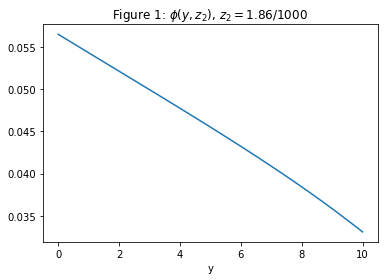

In [11]:
plt.plot(y_grid, ϕ_grid[25])
plt.title(r'Figure 1: $\phi(y, z_2)$, $z_2=1.86/1000$')
plt.xlabel('y')

In [12]:
# np.save('check_2d.npy', ϕ_grid)

In [13]:
def combine_two_grids(y_grid, y_bar, y_grid_before, y_grid_after,
                      ϕ_grid_before, ϕ_grid_after):
    ϕ_grid = np.zeros_like(y_grid)
    for i, y in enumerate(y_grid):
        if y < y_bar:
            ϕ_grid[i] = np.interp(y, y_grid_before, ϕ_grid_before)
        else:
            ϕ_grid[i] = np.interp(y, y_grid_after, ϕ_grid_after)
    return ϕ_grid

In [27]:
ϕ_grid_com_before = combine_two_grids(np.arange(0., 2.1, 0.1), 2., 
                               np.linspace(1e-10, 2, 50), np.linspace(1e-10, 10, 50),
                               ϕ_grid[25], np.average(ϕ_state, axis=0, weights=[0.5, 0.5])[25])
ϕ_grid_com_after = combine_two_grids(np.arange(2., 5, 0.1), 2., 
                               np.linspace(1e-10, 2, 50), np.linspace(1e-10, 10, 50),
                               ϕ_grid[25], np.average(ϕ_state, axis=0, weights=[0.5, 0.5])[25])
ϕ_grid_low = combine_two_grids(np.arange(2., 5, 0.1), 2., 
                               np.linspace(1e-10, 2, 50), np.linspace(1e-10, 10, 50),
                               ϕ_grid[25], ϕ_state[0][25])
ϕ_grid_high = combine_two_grids(np.arange(2., 5, 0.1), 2., 
                               np.linspace(1e-10, 2, 50), np.linspace(1e-10, 10, 50),
                               ϕ_grid[25], ϕ_state[1][25])

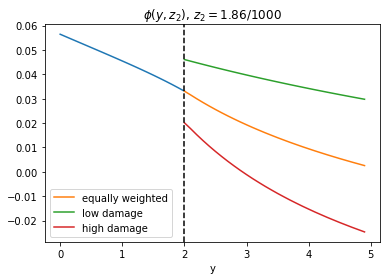

In [29]:
plt.plot(np.arange(0, 2.1, 0.1), ϕ_grid_com_before)
plt.plot(np.arange(2, 5, 0.1), ϕ_grid_com_after, label='equally weighted')
plt.plot(np.arange(2., 5, 0.1), ϕ_grid_low, label='low damage')
plt.plot(np.arange(2., 5, 0.1), ϕ_grid_high, label='high damage')
plt.legend()
plt.title(r'$\phi(y, z_2)$, $z_2=1.86/1000$')
plt.xlabel('y')
plt.axvline(x=2., linestyle='dashed', color='black')
plt.savefig('fig.pdf')